In [55]:
import numpy as np
import pandas as pd
import datetime
import utils
import models
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt

In [29]:
worksheet = utils.get_master_sheet()
df = pd.DataFrame(worksheet.get_all_records())
# df_train = df.iloc[:-300]
# df_test = df.iloc[-300:]
# df = df.sample(frac=1).reset_index(drop=True)
# df['game_date'] = pd.to_datetime(df['game_date'], format='%Y-%m-%d')
# df_train = df[df['game_date'] < datetime.datetime(2023, 10, 1)]
df.head()

/var/folders/rs/6tl6pps1563b8sz8xgxyg9bm0000gn/T/ipykernel_21152/1571977952.py:1: DeprecationWarning: [Deprecated][in version 6.0.0]: client_factory will be replaced by gspread.http_client types
  worksheet = utils.get_master_sheet()


,timestamp,game_date,game_time,name,team,position,opponent,stat,line,hit_percentage,margin,action,actual_stat,outcome,true_action
0,11/19/2023 17:02:49,2023-11-19,5:02:20 PM,Aaron Gordon,DEN,F,CLE,Points,14.5,9.70,40.30,UNDER,11.0,WIN,UNDER
1,11/19/2023 17:02:49,2023-11-19,5:02:20 PM,Darius Garland,CLE,G,DEN,Points,24.0,26.70,23.30,UNDER,26.0,LOSE,OVER
2,11/19/2023 17:02:49,2023-11-19,5:02:20 PM,Kentavious Caldwell-Pope,DEN,G,CLE,Points,8.5,94.03,44.03,OVER,9.0,WIN,OVER
3,11/19/2023 17:02:49,2023-11-19,5:02:20 PM,Evan Mobley,CLE,C,DEN,Points,18.5,26.17,23.83,UNDER,16.0,WIN,UNDER
4,11/19/2023 17:02:49,2023-11-19,5:02:20 PM,Michael Porter Jr.,DEN,F,CLE,Points,17.5,79.99,29.99,OVER,21.0,WIN,OVER


In [30]:
X = []
Y = []
for i, row in df_train.iterrows():
    if row['true_action'] == 'PUSH':
        continue
    if pd.isna(row['true_action']) or row['true_action'] == '':
        continue
    player_name = row['name']
    stat = row['stat']
    pp_line = float(row['line'])
    opponent = row['opponent']
    game_date=datetime.datetime.strptime(row['game_date'], '%Y-%m-%d')
    gamelog = utils.get_games_by_player(player_name, game_date-datetime.timedelta(days=1))
    stat_name = utils.get_stat_name(stat)
    past_5 = models.avg_player_stats_pastngames(gamelog, stat_name, pp_line, 5)
    past_10 = models.avg_player_stats_pastngames(gamelog, stat_name, pp_line, 10)
    past_15 = models.avg_player_stats_pastngames(gamelog, stat_name, pp_line, 15)
    season = models.avg_player_stats_season(gamelog, stat_name, pp_line)
    vs_opp = models.avg_player_stats_vsteam(gamelog, stat_name, pp_line, opponent)
    thisgame = gamelog[gamelog['GAME_DATE'] == game_date]
    if len(thisgame) == 0:
        away = 0.5
    else:
        thisgame = thisgame.iloc[0]
        location = 'away' if '@' in thisgame['MATCHUP'] else 'home'
        away = models.avg_player_stats_homeaway(gamelog, stat_name, pp_line, location)
    b2b = models.days_since_last_game(gamelog, game_date)
    X.append([past_5, past_10, past_15, season, vs_opp, away, b2b])
    Y.append(1 if row['true_action'] == 'OVER' else 0)
    print(f'{i}/{len(df)}')

0/3026
1/3026
2/3026
3/3026
4/3026
5/3026
6/3026
7/3026
8/3026
9/3026
10/3026
11/3026
12/3026
13/3026
14/3026
15/3026
16/3026
17/3026
18/3026
19/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


20/3026
21/3026
22/3026
23/3026
24/3026
25/3026
26/3026
27/3026
28/3026
29/3026
30/3026
31/3026
32/3026
33/3026
34/3026
35/3026
36/3026
37/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


38/3026
39/3026
40/3026
41/3026
42/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


43/3026
44/3026
45/3026
46/3026
47/3026
48/3026
49/3026
50/3026
51/3026
52/3026
53/3026
54/3026
55/3026
56/3026
57/3026
59/3026
60/3026
62/3026
63/3026
64/3026
65/3026
66/3026
67/3026
68/3026
70/3026
71/3026
72/3026
74/3026
75/3026
76/3026
77/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


78/3026
79/3026
80/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


81/3026
82/3026
83/3026
84/3026
85/3026
86/3026
87/3026
88/3026
89/3026
90/3026
91/3026
92/3026
93/3026
94/3026
96/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


97/3026
98/3026
99/3026
100/3026
101/3026
102/3026
103/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


104/3026
105/3026
107/3026
108/3026
109/3026
110/3026
111/3026
112/3026
113/3026
114/3026
115/3026
116/3026
117/3026
118/3026
119/3026
120/3026
121/3026
122/3026
123/3026
124/3026
125/3026
126/3026
127/3026
129/3026
130/3026
131/3026
132/3026
133/3026
134/3026
135/3026
136/3026
137/3026
138/3026
139/3026
140/3026
141/3026
142/3026
143/3026
144/3026
145/3026
146/3026
147/3026
148/3026
149/3026
150/3026
151/3026
152/3026
153/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


154/3026
155/3026
156/3026
157/3026
158/3026
159/3026
160/3026
161/3026
162/3026
163/3026
164/3026
165/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


166/3026
167/3026
168/3026
169/3026
170/3026
171/3026
172/3026
173/3026
174/3026
175/3026
176/3026
177/3026
178/3026
179/3026
180/3026
181/3026
182/3026
183/3026
184/3026
185/3026
186/3026
187/3026
188/3026
189/3026
190/3026
191/3026
192/3026
193/3026
194/3026
195/3026
196/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


197/3026
198/3026
199/3026
200/3026
201/3026
202/3026
203/3026
204/3026
205/3026
206/3026
207/3026
208/3026
209/3026
210/3026
211/3026
212/3026
213/3026
214/3026
215/3026
216/3026
217/3026
218/3026
219/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


220/3026
221/3026
222/3026
223/3026
224/3026
225/3026
226/3026
227/3026
228/3026
229/3026
230/3026
231/3026
232/3026
233/3026
234/3026
235/3026
236/3026
237/3026
238/3026
239/3026
240/3026
241/3026
242/3026
243/3026
244/3026
245/3026
246/3026
247/3026
248/3026
249/3026
250/3026
251/3026
252/3026
253/3026
254/3026
255/3026
256/3026
257/3026
258/3026
259/3026
260/3026
261/3026
262/3026
263/3026
264/3026
265/3026
266/3026
267/3026
268/3026
269/3026
270/3026
271/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


272/3026
273/3026
274/3026
275/3026
276/3026
277/3026
278/3026
279/3026
280/3026
282/3026
283/3026
284/3026
286/3026
287/3026
288/3026
289/3026
290/3026
291/3026
292/3026
293/3026
294/3026
295/3026
296/3026
297/3026
298/3026
301/3026
302/3026
303/3026
304/3026
305/3026
306/3026
307/3026
308/3026
309/3026
310/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


311/3026
312/3026
313/3026
314/3026
315/3026
316/3026
317/3026
318/3026
319/3026
320/3026
321/3026
322/3026
323/3026
324/3026
325/3026
326/3026
327/3026
328/3026
329/3026
330/3026
331/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


332/3026
333/3026
334/3026
335/3026
336/3026
337/3026
338/3026
339/3026
340/3026
341/3026
342/3026
343/3026
344/3026
345/3026
346/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


347/3026
348/3026
349/3026
350/3026
351/3026
352/3026
353/3026
354/3026
355/3026
356/3026
357/3026
358/3026
359/3026
360/3026
361/3026
362/3026
363/3026
364/3026
365/3026
366/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


367/3026
368/3026
369/3026
370/3026
371/3026
372/3026
373/3026
374/3026
375/3026
376/3026
377/3026
378/3026
379/3026
380/3026
381/3026
382/3026
383/3026
384/3026
385/3026
386/3026
387/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


388/3026
389/3026
390/3026
391/3026
392/3026
393/3026
394/3026
395/3026
396/3026
397/3026
398/3026
399/3026
400/3026
401/3026
402/3026
403/3026
404/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


405/3026
406/3026
407/3026
408/3026
409/3026
411/3026
412/3026
413/3026
414/3026
415/3026
416/3026
417/3026
418/3026
419/3026
420/3026
421/3026
422/3026
423/3026
424/3026
425/3026
426/3026
427/3026
428/3026
429/3026
430/3026
431/3026
432/3026
433/3026
434/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


435/3026
436/3026
437/3026
438/3026
439/3026
440/3026
441/3026
442/3026
443/3026
444/3026
445/3026
446/3026
447/3026
448/3026
449/3026
450/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


451/3026
452/3026
453/3026
454/3026
455/3026
456/3026
457/3026
458/3026
459/3026
460/3026
461/3026
462/3026
463/3026
464/3026
465/3026
466/3026
467/3026
468/3026
469/3026
470/3026
471/3026
472/3026
473/3026
474/3026
475/3026
476/3026
477/3026
478/3026
479/3026
480/3026
481/3026
482/3026
483/3026
484/3026
485/3026
486/3026
487/3026
488/3026
489/3026
490/3026
491/3026
492/3026
493/3026
494/3026
495/3026
496/3026
497/3026
498/3026
499/3026
500/3026
501/3026
502/3026
503/3026
504/3026
505/3026
506/3026
507/3026
508/3026
509/3026
510/3026
511/3026
512/3026
513/3026
514/3026
515/3026
516/3026
517/3026
518/3026
519/3026
520/3026
521/3026
522/3026
523/3026
524/3026
525/3026
526/3026
527/3026
528/3026
529/3026
530/3026
531/3026
532/3026
533/3026
534/3026
535/3026
536/3026
537/3026
538/3026
539/3026
540/3026
541/3026
542/3026
543/3026
544/3026
545/3026
546/3026
547/3026
548/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


549/3026
550/3026
551/3026
553/3026
554/3026
555/3026
556/3026
557/3026
558/3026
560/3026
561/3026
562/3026
563/3026
564/3026
566/3026
568/3026
569/3026
570/3026
571/3026
572/3026
573/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


574/3026
575/3026
576/3026
577/3026
580/3026
581/3026
582/3026
584/3026
585/3026
586/3026
587/3026
588/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


589/3026
590/3026
591/3026
592/3026
593/3026
594/3026
595/3026
596/3026
597/3026
598/3026
599/3026
600/3026
601/3026
602/3026
603/3026
604/3026
605/3026
606/3026
607/3026
608/3026
609/3026
610/3026
611/3026
613/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


614/3026
615/3026
616/3026
617/3026
618/3026
619/3026
620/3026
621/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


622/3026
623/3026
624/3026
625/3026
626/3026
627/3026
628/3026
629/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


630/3026
631/3026
632/3026
633/3026
634/3026
635/3026
636/3026
637/3026
638/3026
639/3026
640/3026
641/3026
642/3026
643/3026
644/3026
645/3026
646/3026
647/3026
648/3026
649/3026
650/3026
651/3026
652/3026
653/3026
654/3026
655/3026
656/3026
657/3026
658/3026
659/3026
660/3026
661/3026
662/3026
663/3026
664/3026
665/3026
666/3026
667/3026
668/3026
669/3026
670/3026
671/3026
672/3026
673/3026
674/3026
675/3026
676/3026
677/3026
678/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


679/3026
680/3026
681/3026
682/3026
683/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


684/3026
685/3026
686/3026
687/3026
688/3026
689/3026
690/3026
691/3026
692/3026
693/3026
694/3026
695/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


696/3026
697/3026
698/3026
699/3026
700/3026
701/3026
702/3026
703/3026
704/3026
705/3026
706/3026
707/3026
708/3026
709/3026
710/3026
711/3026
712/3026
713/3026
714/3026
715/3026
716/3026
717/3026
718/3026
719/3026
720/3026
721/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


722/3026
723/3026
724/3026
725/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


726/3026
727/3026
728/3026
729/3026
730/3026
731/3026
732/3026
733/3026
734/3026
735/3026
736/3026
737/3026
738/3026
739/3026
740/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


741/3026
742/3026
743/3026
744/3026
745/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


746/3026
747/3026
748/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


749/3026
750/3026
751/3026
752/3026
753/3026
754/3026
755/3026
756/3026
757/3026
758/3026
759/3026
760/3026
761/3026
762/3026
763/3026
764/3026
765/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


766/3026
767/3026
768/3026
769/3026
770/3026
771/3026
772/3026
773/3026
774/3026
775/3026
776/3026
777/3026
778/3026
779/3026
780/3026
781/3026
782/3026
783/3026
784/3026
785/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


786/3026
787/3026
788/3026
789/3026
790/3026
791/3026
792/3026
793/3026
794/3026
795/3026
796/3026
797/3026
798/3026
799/3026
800/3026
801/3026
802/3026
803/3026
804/3026
805/3026
806/3026
807/3026
808/3026
809/3026
810/3026
811/3026
812/3026
813/3026
814/3026
815/3026
816/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


817/3026
818/3026
819/3026
820/3026
821/3026
822/3026
823/3026
824/3026
825/3026
826/3026
827/3026
828/3026
829/3026
830/3026
831/3026
832/3026
833/3026
834/3026
835/3026
836/3026
837/3026
839/3026
840/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


841/3026
842/3026
843/3026
844/3026
845/3026
846/3026
847/3026
848/3026
849/3026
850/3026
851/3026
852/3026
853/3026
854/3026
855/3026
856/3026
857/3026
860/3026
861/3026
862/3026
863/3026
864/3026
866/3026
867/3026
868/3026
869/3026
870/3026
871/3026
872/3026
873/3026
874/3026
875/3026
876/3026
877/3026
878/3026
879/3026
881/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


882/3026
883/3026
884/3026
885/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


886/3026
887/3026
888/3026
889/3026
890/3026
891/3026
892/3026
893/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


894/3026
895/3026
896/3026
897/3026
898/3026
899/3026
900/3026
901/3026
902/3026
903/3026
904/3026
905/3026
906/3026
907/3026
908/3026
909/3026
910/3026
911/3026
912/3026
913/3026
914/3026
915/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


916/3026
917/3026
918/3026
920/3026
921/3026
922/3026
923/3026
924/3026
926/3026
927/3026
928/3026
929/3026
930/3026
931/3026
932/3026
933/3026
934/3026
935/3026
936/3026
937/3026
938/3026
939/3026
940/3026
941/3026
942/3026
943/3026
944/3026
945/3026
947/3026
948/3026
949/3026
950/3026
951/3026
952/3026
953/3026
954/3026
955/3026
956/3026
957/3026
958/3026
959/3026
960/3026
961/3026
962/3026
963/3026
964/3026
965/3026
966/3026
967/3026
968/3026
969/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


970/3026
971/3026
972/3026
973/3026
974/3026
975/3026
976/3026
977/3026
978/3026
979/3026
980/3026
981/3026
982/3026
983/3026
984/3026
985/3026
986/3026
987/3026
988/3026
989/3026
990/3026
991/3026
992/3026
993/3026
994/3026
995/3026
996/3026
997/3026
998/3026
999/3026
1000/3026
1001/3026
1002/3026
1003/3026
1004/3026
1005/3026
1006/3026
1008/3026
1009/3026
1010/3026
1011/3026
1012/3026
1013/3026
1014/3026
1015/3026
1018/3026
1019/3026
1020/3026
1021/3026
1022/3026
1023/3026
1024/3026
1025/3026
1026/3026
1027/3026
1028/3026
1029/3026
1030/3026
1031/3026
1032/3026
1034/3026
1035/3026
1036/3026
1037/3026
1038/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


1039/3026
1040/3026
1041/3026
1042/3026
1043/3026
1044/3026
1045/3026
1046/3026
1049/3026
1050/3026
1051/3026
1052/3026
1053/3026
1054/3026
1055/3026
1056/3026
1057/3026
1058/3026
1059/3026
1060/3026
1061/3026
1062/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


1063/3026
1064/3026
1065/3026
1066/3026
1067/3026
1068/3026
1069/3026
1070/3026
1071/3026
1072/3026
1073/3026
1074/3026
1075/3026
1076/3026
1077/3026
1078/3026
1079/3026
1080/3026
1081/3026
1082/3026
1083/3026
1084/3026
1085/3026
1086/3026
1087/3026
1088/3026
1089/3026
1090/3026
1091/3026
1092/3026
1093/3026
1094/3026
1096/3026
1097/3026
1098/3026
1099/3026
1101/3026
1102/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


1103/3026
1106/3026
1107/3026
1108/3026
1110/3026
1111/3026
1112/3026
1113/3026
1114/3026
1115/3026
1116/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


1117/3026
1118/3026
1119/3026
1120/3026
1121/3026
1122/3026
1123/3026
1124/3026
1125/3026
1126/3026
1127/3026
1128/3026
1129/3026
1130/3026
1131/3026
1133/3026
1134/3026
1135/3026
1136/3026
1137/3026
1139/3026
1140/3026
1141/3026
1142/3026
1143/3026
1144/3026
1145/3026
1146/3026
1148/3026
1149/3026
1150/3026
1151/3026
1152/3026
1153/3026
1154/3026
1155/3026
1156/3026
1157/3026
1158/3026
1159/3026
1160/3026
1161/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


1162/3026
1163/3026
1164/3026
1165/3026
1166/3026
1167/3026
1168/3026
1169/3026
1170/3026
1171/3026
1172/3026
1173/3026
1174/3026
1175/3026
1176/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


1177/3026
1179/3026
1180/3026
1181/3026
1182/3026
1183/3026
1184/3026
1185/3026
1186/3026
1187/3026
1188/3026
1189/3026
1190/3026
1191/3026
1192/3026
1193/3026
1194/3026
1195/3026
1196/3026
1197/3026
1198/3026
1199/3026
1200/3026
1201/3026
1202/3026
1203/3026
1204/3026
1205/3026
1206/3026
1207/3026
1208/3026
1209/3026
1210/3026
1211/3026
1212/3026
1213/3026
1214/3026
1215/3026
1216/3026
1217/3026
1218/3026
1219/3026
1220/3026
1221/3026
1222/3026
1223/3026
1224/3026
1225/3026
1226/3026
1227/3026
1228/3026
1229/3026
1230/3026
1231/3026
1232/3026
1233/3026
1234/3026
1235/3026
1236/3026
1237/3026
1238/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


1239/3026
1240/3026
1241/3026
1242/3026
1243/3026
1244/3026
1245/3026
1246/3026
1247/3026
1248/3026
1249/3026
1250/3026
1251/3026
1252/3026
1253/3026
1254/3026
1255/3026
1256/3026
1257/3026
1258/3026
1259/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


1260/3026
1261/3026
1262/3026
1263/3026
1264/3026
1265/3026
1266/3026
1267/3026
1268/3026
1269/3026
1270/3026
1271/3026
1272/3026
1273/3026
1274/3026
1275/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


1276/3026
1277/3026
1278/3026
1279/3026
1280/3026
1281/3026
1282/3026
1283/3026
1284/3026
1285/3026
1286/3026
1287/3026
1288/3026
1289/3026
1290/3026
1291/3026
1292/3026
1293/3026
1294/3026
1295/3026
1296/3026
1297/3026
1298/3026
1299/3026
1300/3026
1301/3026
1302/3026
1303/3026
1304/3026
1305/3026
1306/3026
1307/3026
1308/3026
1309/3026
1310/3026
1311/3026
1312/3026
1313/3026
1314/3026
1315/3026
1316/3026
1317/3026
1318/3026
1319/3026
1320/3026
1323/3026
1324/3026
1325/3026
1326/3026
1327/3026
1328/3026
1329/3026
1330/3026
1331/3026
1332/3026
1333/3026
1334/3026
1335/3026
1336/3026
1337/3026
1338/3026
1339/3026
1340/3026
1341/3026
1342/3026
1343/3026
1344/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


1345/3026
1346/3026
1347/3026
1348/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


1349/3026
1350/3026
1351/3026
1352/3026
1353/3026
1354/3026
1355/3026
1356/3026
1357/3026
1358/3026
1359/3026
1360/3026
1361/3026
1362/3026
1363/3026
1364/3026
1365/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


1366/3026
1367/3026
1368/3026
1369/3026
1370/3026
1371/3026
1372/3026
1373/3026
1374/3026
1375/3026
1376/3026
1377/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


1378/3026
1379/3026
1380/3026
1381/3026
1382/3026
1383/3026
1384/3026
1385/3026
1386/3026
1387/3026
1388/3026
1389/3026
1390/3026
1391/3026
1392/3026
1393/3026
1394/3026
1395/3026
1396/3026
1397/3026
1398/3026
1399/3026
1400/3026
1401/3026
1402/3026
1403/3026
1404/3026
1405/3026
1406/3026
1407/3026
1408/3026
1409/3026
1410/3026
1411/3026
1412/3026
1413/3026
1414/3026
1415/3026
1416/3026
1417/3026
1418/3026
1419/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


1420/3026
1421/3026
1422/3026
1423/3026
1424/3026
1425/3026
1426/3026
1427/3026
1428/3026
1429/3026
1430/3026
1431/3026
1432/3026
1433/3026
1434/3026
1435/3026
1436/3026
1437/3026
1438/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


1439/3026
1440/3026
1441/3026
1442/3026
1443/3026
1444/3026
1445/3026
1446/3026
1447/3026
1448/3026
1449/3026
1450/3026
1451/3026
1452/3026
1453/3026
1454/3026
1455/3026
1456/3026
1457/3026
1458/3026
1459/3026
1460/3026
1461/3026
1462/3026
1463/3026
1464/3026
1465/3026
1466/3026
1467/3026
1468/3026
1469/3026
1470/3026
1471/3026
1472/3026
1473/3026
1474/3026
1475/3026
1476/3026
1477/3026
1478/3026
1479/3026
1480/3026
1481/3026
1482/3026
1483/3026
1484/3026
1485/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


1486/3026
1487/3026
1488/3026
1489/3026
1490/3026
1491/3026
1492/3026
1493/3026
1494/3026
1495/3026
1496/3026
1497/3026
1498/3026
1499/3026
1500/3026
1501/3026
1502/3026
1503/3026
1504/3026
1505/3026
1506/3026
1507/3026
1508/3026
1509/3026
1510/3026
1511/3026
1512/3026
1513/3026
1514/3026
1515/3026
1516/3026
1517/3026
1518/3026
1519/3026
1520/3026
1521/3026
1522/3026
1523/3026
1524/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


1525/3026
1526/3026
1527/3026
1528/3026
1529/3026
1530/3026
1531/3026
1532/3026
1533/3026
1534/3026
1535/3026
1536/3026
1537/3026
1538/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


1539/3026
1540/3026
1541/3026
1542/3026
1543/3026
1544/3026
1545/3026
1546/3026
1547/3026
1548/3026
1549/3026
1550/3026
1551/3026
1552/3026
1553/3026
1554/3026
1555/3026
1556/3026
1557/3026
1558/3026
1559/3026
1560/3026
1561/3026
1562/3026
1564/3026
1565/3026
1566/3026
1567/3026
1568/3026
1569/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


1571/3026
1572/3026
1573/3026
1574/3026
1575/3026
1576/3026
1577/3026
1578/3026
1580/3026
1581/3026
1582/3026
1583/3026
1584/3026
1585/3026
1586/3026
1587/3026
1588/3026
1589/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


1590/3026
1591/3026
1592/3026
1593/3026
1594/3026
1595/3026
1596/3026
1597/3026
1598/3026
1599/3026
1600/3026
1601/3026
1602/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


1603/3026
1604/3026
1605/3026
1606/3026
1607/3026
1608/3026
1609/3026
1610/3026
1611/3026
1612/3026
1613/3026
1614/3026
1615/3026
1616/3026
1617/3026
1618/3026
1619/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


1620/3026
1621/3026
1622/3026
1623/3026
1624/3026
1625/3026
1626/3026
1627/3026
1628/3026
1629/3026
1630/3026
1631/3026
1632/3026
1633/3026
1634/3026
1635/3026
1636/3026
1637/3026
1638/3026
1639/3026
1640/3026
1641/3026
1642/3026
1643/3026
1644/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


1645/3026
1646/3026
1647/3026
1648/3026
1650/3026
1651/3026
1652/3026
1653/3026
1654/3026
1655/3026
1656/3026
1657/3026
1658/3026
1659/3026
1660/3026
1661/3026
1662/3026
1663/3026
1664/3026
1665/3026
1666/3026
1667/3026
1668/3026
1669/3026
1670/3026
1671/3026
1672/3026
1673/3026
1674/3026
1675/3026
1676/3026
1677/3026
1678/3026
1679/3026
1680/3026
1681/3026
1682/3026
1683/3026
1684/3026
1685/3026
1686/3026
1687/3026
1688/3026
1689/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


1690/3026
1691/3026
1692/3026
1693/3026
1694/3026
1695/3026
1696/3026
1697/3026
1698/3026
1700/3026
1701/3026
1702/3026
1703/3026
1704/3026
1705/3026
1706/3026
1707/3026
1708/3026
1709/3026
1710/3026
1711/3026
1712/3026
1713/3026
1714/3026
1715/3026
1716/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


1717/3026
1718/3026
1719/3026
1720/3026
1721/3026
1722/3026
1723/3026
1724/3026
1725/3026
1726/3026
1727/3026
1728/3026
1729/3026
1730/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


1731/3026
1732/3026
1733/3026
1734/3026
1735/3026
1736/3026
1737/3026
1738/3026
1739/3026
1740/3026
1741/3026
1742/3026
1743/3026
1744/3026
1745/3026
1746/3026
1747/3026
1748/3026
1749/3026
1750/3026
1751/3026
1752/3026
1753/3026
1754/3026
1755/3026
1756/3026
1757/3026
1758/3026
1759/3026
1760/3026
1761/3026
1762/3026
1763/3026
1764/3026
1765/3026
1766/3026
1767/3026
1768/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


1769/3026
1770/3026
1771/3026
1772/3026
1773/3026
1774/3026
1775/3026
1776/3026
1777/3026
1778/3026
1779/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


1781/3026
1782/3026
1783/3026
1784/3026
1785/3026
1786/3026
1787/3026
1788/3026
1789/3026
1790/3026
1791/3026
1792/3026
1794/3026
1795/3026
1796/3026
1797/3026
1798/3026
1799/3026
1800/3026
1801/3026
1802/3026
1803/3026
1804/3026
1805/3026
1806/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


1807/3026
1808/3026
1809/3026
1810/3026
1811/3026
1812/3026
1813/3026
1814/3026
1815/3026
1816/3026
1817/3026
1818/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


1819/3026
1820/3026
1821/3026
1822/3026
1823/3026
1824/3026
1825/3026
1826/3026
1827/3026
1828/3026
1829/3026
1830/3026
1831/3026
1832/3026
1833/3026
1834/3026
1835/3026
1836/3026
1837/3026
1838/3026
1839/3026
1840/3026
1841/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


1842/3026
1843/3026
1844/3026
1845/3026
1846/3026
1847/3026
1848/3026
1849/3026
1850/3026
1851/3026
1852/3026
1853/3026
1854/3026
1855/3026
1856/3026
1857/3026
1858/3026
1859/3026
1860/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


1861/3026
1862/3026
1863/3026
1864/3026
1865/3026
1866/3026
1867/3026
1868/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


1869/3026
1870/3026
1871/3026
1872/3026
1873/3026
1874/3026
1875/3026
1876/3026
1877/3026
1878/3026
1879/3026
1880/3026
1881/3026
1882/3026
1883/3026
1884/3026
1885/3026
1886/3026
1887/3026
1888/3026
1889/3026
1890/3026
1891/3026
1892/3026
1893/3026
1894/3026
1895/3026
1896/3026
1897/3026
1898/3026
1899/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


1900/3026
1901/3026
1902/3026
1903/3026
1904/3026
1905/3026
1906/3026
1907/3026
1908/3026
1909/3026
1910/3026
1911/3026
1912/3026
1913/3026
1914/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


1915/3026
1916/3026
1917/3026
1918/3026
1919/3026
1920/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


1921/3026
1922/3026
1923/3026
1924/3026
1925/3026
1926/3026
1927/3026
1928/3026
1929/3026
1930/3026
1931/3026
1932/3026
1933/3026
1934/3026
1935/3026
1936/3026
1937/3026
1938/3026
1939/3026
1941/3026
1942/3026
1944/3026
1945/3026
1947/3026
1948/3026
1949/3026
1950/3026
1951/3026
1952/3026
1954/3026
1955/3026
1956/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


1957/3026
1958/3026
1959/3026
1960/3026
1962/3026
1963/3026
1964/3026
1966/3026
1967/3026
1968/3026
1969/3026
1970/3026
1971/3026
1972/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


1973/3026
1974/3026
1975/3026
1977/3026
1978/3026
1979/3026
1980/3026
1981/3026
1982/3026
1983/3026
1984/3026
1985/3026
1986/3026
1987/3026
1988/3026
1989/3026
1990/3026
1991/3026
1992/3026
1993/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


1994/3026
1995/3026
1996/3026
1997/3026
1998/3026
1999/3026
2000/3026
2001/3026
2002/3026
2003/3026
2004/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


2005/3026
2006/3026
2007/3026
2008/3026
2009/3026
2010/3026
2011/3026
2012/3026
2013/3026
2014/3026
2015/3026
2016/3026
2017/3026
2018/3026
2019/3026
2020/3026
2021/3026
2022/3026
2023/3026
2024/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


2025/3026
2026/3026
2027/3026
2028/3026
2029/3026
2030/3026
2031/3026
2032/3026
2033/3026
2034/3026
2035/3026
2036/3026
2037/3026
2038/3026
2039/3026
2040/3026
2041/3026
2042/3026
2043/3026
2044/3026
2045/3026
2046/3026
2047/3026
2048/3026
2049/3026
2050/3026
2051/3026
2052/3026
2053/3026
2054/3026
2055/3026
2056/3026
2057/3026
2058/3026
2059/3026
2060/3026
2061/3026
2062/3026
2063/3026
2064/3026
2065/3026
2066/3026
2067/3026
2068/3026
2069/3026
2070/3026
2071/3026
2073/3026
2074/3026
2075/3026
2076/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


2077/3026
2078/3026
2079/3026
2080/3026
2081/3026
2082/3026
2083/3026
2084/3026
2085/3026
2086/3026
2087/3026
2088/3026
2089/3026
2090/3026
2091/3026
2092/3026
2094/3026
2095/3026
2096/3026
2097/3026
2098/3026
2099/3026
2100/3026
2101/3026
2102/3026
2103/3026
2104/3026
2105/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


2106/3026
2107/3026
2108/3026
2109/3026
2110/3026
2112/3026
2113/3026
2114/3026
2115/3026
2116/3026
2117/3026
2118/3026
2119/3026
2120/3026
2121/3026
2122/3026
2123/3026
2124/3026
2125/3026
2126/3026
2128/3026
2129/3026
2130/3026
2131/3026
2132/3026
2133/3026
2134/3026
2135/3026
2136/3026
2137/3026
2138/3026
2139/3026
2140/3026
2141/3026
2142/3026
2143/3026
2144/3026
2145/3026
2146/3026
2147/3026
2148/3026
2149/3026
2150/3026
2151/3026
2152/3026
2153/3026
2154/3026
2155/3026
2156/3026
2157/3026
2158/3026
2159/3026
2160/3026
2161/3026
2162/3026
2163/3026
2164/3026
2165/3026
2166/3026
2167/3026
2168/3026
2169/3026
2170/3026
2171/3026
2172/3026
2173/3026
2174/3026
2175/3026
2176/3026
2177/3026
2178/3026
2179/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


2180/3026
2181/3026
2182/3026
2183/3026
2184/3026
2185/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


2186/3026
2187/3026
2188/3026
2189/3026
2190/3026
2191/3026
2192/3026
2193/3026
2194/3026
2195/3026
2196/3026
2197/3026
2198/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


2199/3026
2200/3026
2201/3026
2202/3026
2203/3026
2204/3026
2205/3026
2206/3026
2207/3026
2208/3026
2209/3026
2210/3026
2211/3026
2212/3026
2213/3026
2214/3026
2215/3026
2216/3026
2217/3026
2218/3026
2219/3026
2220/3026
2221/3026
2222/3026
2223/3026
2224/3026
2225/3026
2226/3026
2227/3026
2228/3026
2229/3026
2230/3026
2231/3026
2232/3026
2233/3026
2234/3026
2235/3026
2236/3026
2237/3026
2238/3026
2239/3026
2240/3026
2241/3026
2242/3026
2243/3026
2244/3026
2245/3026
2246/3026
2247/3026
2248/3026
2249/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


2250/3026
2251/3026
2253/3026
2254/3026
2255/3026
2256/3026
2257/3026
2258/3026
2259/3026
2260/3026
2261/3026
2262/3026
2263/3026
2264/3026
2265/3026
2266/3026
2267/3026
2268/3026
2269/3026
2270/3026
2271/3026
2272/3026
2273/3026
2274/3026
2275/3026
2276/3026
2277/3026
2278/3026
2279/3026
2280/3026
2281/3026
2282/3026
2283/3026
2284/3026
2285/3026
2286/3026
2287/3026
2288/3026
2289/3026
2290/3026
2291/3026
2292/3026
2294/3026
2295/3026
2296/3026
2297/3026
2298/3026
2299/3026
2300/3026
2301/3026
2302/3026
2303/3026
2304/3026
2305/3026
2307/3026
2308/3026
2309/3026
2310/3026
2311/3026
2312/3026
2313/3026
2314/3026
2315/3026
2316/3026
2317/3026
2318/3026
2319/3026
2320/3026
2321/3026
2322/3026
2323/3026
2324/3026
2325/3026
2326/3026
2327/3026
2328/3026
2329/3026
2330/3026
2331/3026
2332/3026
2333/3026
2334/3026
2335/3026
2336/3026
2337/3026
2338/3026
2339/3026
2340/3026
2341/3026
2342/3026
2343/3026
2344/3026
2345/3026
2346/3026
2347/3026
2348/3026
2349/3026
2350/3026
2351/3026
2352/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


2506/3026
2507/3026
2508/3026
2509/3026
2510/3026
2511/3026
2512/3026
2513/3026
2514/3026
2515/3026
2516/3026
2517/3026
2518/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


2519/3026
2520/3026
2522/3026
2523/3026
2524/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


2525/3026
2526/3026
2527/3026
2528/3026
2529/3026
2530/3026
2531/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


2532/3026
2533/3026
2534/3026
2535/3026
2536/3026
2537/3026
2538/3026
2539/3026
2540/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


2541/3026
2542/3026
2543/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


2544/3026
2545/3026
2546/3026
2547/3026
2548/3026
2549/3026
2550/3026
2551/3026
2552/3026
2553/3026
2554/3026
2555/3026
2556/3026
2557/3026
2558/3026
2559/3026
2560/3026
2561/3026
2562/3026
2563/3026
2564/3026
2565/3026
2566/3026
2567/3026
2568/3026
2569/3026
2570/3026
2571/3026
2572/3026
2573/3026
2574/3026
2575/3026
2577/3026
2579/3026
2581/3026
2582/3026
2583/3026
2584/3026
2585/3026
2586/3026
2587/3026
2588/3026
2589/3026
2590/3026
2591/3026
2592/3026
2593/3026
2595/3026
2596/3026
2597/3026
2598/3026
2599/3026
2600/3026
2602/3026
2603/3026
2604/3026
2605/3026
2606/3026
2607/3026
2608/3026
2609/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


2610/3026
2611/3026
2612/3026
2613/3026
2614/3026
2615/3026
2616/3026
2617/3026
2619/3026
2620/3026
2621/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


2622/3026
2623/3026
2625/3026
2626/3026
2627/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


2628/3026
2629/3026
2630/3026
2631/3026
2632/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


2633/3026
2634/3026
2635/3026
2636/3026
2637/3026
2638/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


2639/3026
2641/3026
2643/3026
2644/3026
2645/3026
2646/3026
2647/3026
2648/3026
2649/3026
2650/3026
2651/3026
2654/3026
2655/3026
2656/3026
2657/3026
2658/3026
2659/3026
2660/3026
2661/3026
2662/3026
2663/3026
2664/3026
2665/3026
2666/3026
2667/3026
2668/3026
2669/3026
2670/3026
2671/3026
2672/3026
2673/3026
2674/3026
2675/3026
2676/3026
2677/3026
2679/3026
2681/3026
2682/3026
2683/3026
2684/3026
2687/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


2688/3026
2689/3026
2690/3026
2691/3026
2692/3026
2693/3026
2694/3026
2695/3026
2696/3026
2698/3026
2699/3026
2700/3026
2702/3026
2703/3026
2704/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


2705/3026
2706/3026
2707/3026
2708/3026
2709/3026
2710/3026
2711/3026
2712/3026
2713/3026
2714/3026
2715/3026
2717/3026
2718/3026
2719/3026
2720/3026
2721/3026


/Users/aniruddhsriram/Desktop/betting/src/utils.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


2723/3026
2724/3026
2725/3026


In [63]:
X = np.array(X)
Y = np.array(Y)
n = len(X)
splitpt = 400
X_train = X[:-splitpt, :]
Y_train = Y[:-splitpt]
X_test = X[-splitpt:, :]
Y_test = Y[-splitpt:]
clf = AdaBoostClassifier(n_estimators=100, random_state=0).fit(X_train, Y_train)
# clf = LogisticRegression().fit(X_train, Y_train)
train_acc = clf.score(X_train, Y_train)
test_acc = clf.score(X_test, Y_test)
print(f'Accuracy on train set: {train_acc}')
print(f'Accuracy on test set: {test_acc}')

Accuracy on train set: 0.5839677563815495
Accuracy on test set: 0.51


In [21]:
# X = np.load('x.npy')
# y = np.load('y.npy')
kf = KFold(n_splits=4, shuffle=True)
avg_acc = []
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {i}:")
    print(f"  Train: index={len(train_index)}")
    print(f"  Test:  index={len(test_index)}")
    X_train = X[train_index]
    y_train = Y[train_index]
    X_test = X[test_index]
    y_test = Y[test_index]
    clf = LogisticRegression().fit(X_train, y_train)
    train_acc = clf.score(X_train, y_train)
    test_acc = clf.score(X_test, y_test)
    print(f'Accuracy on train set: {train_acc}')
    print(f'Accuracy on test set: {test_acc}')
    avg_acc.append(test_acc)
print(avg_acc)
print(np.mean(np.array(avg_acc)))

Fold 0:
  Train: index=293
  Test:  index=98
Accuracy on train set: 0.5494880546075085
Accuracy on test set: 0.5306122448979592
Fold 1:
  Train: index=293
  Test:  index=98
Accuracy on train set: 0.515358361774744
Accuracy on test set: 0.46938775510204084
Fold 2:
  Train: index=293
  Test:  index=98
Accuracy on train set: 0.5324232081911263
Accuracy on test set: 0.5
Fold 3:
  Train: index=294
  Test:  index=97
Accuracy on train set: 0.5136054421768708
Accuracy on test set: 0.5360824742268041
[0.5306122448979592, 0.46938775510204084, 0.5, 0.5360824742268041]
0.509020618556701


In [5]:
X = np.array(X)
y = np.array(Y)
# xdata = X[:, [0, 3]]
perm = np.random.permutation(len(X))
X = X[perm]
y = y[perm]
split = int(0.8*len(X))
X_train = X[:split, :]
X_test = X[split:, :]
y_train = y[:split]
y_test = y[split:]
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(706, 6) (177, 6) (706,) (177,)


-0.4931548356902651

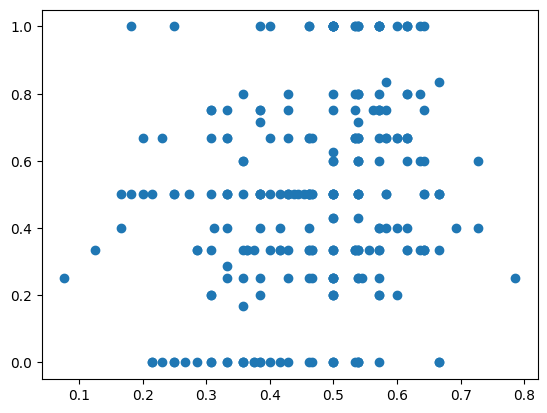

In [59]:
plt.scatter(X[:, 1], X[:, 2])
np.corrcoef(X)[2, 1]

In [6]:
clf = LogisticRegression().fit(X_train, y_train)

In [7]:
clf.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [8]:
coef = clf.coef_[0]
intercept = clf.intercept_
'''
y = b0 + b1x1 + b2x2 + ...
p = b0 + b1x1 + b2x2 + ...
odds = p/1-p
log odds = log(p/1-p)
log(p/1-p) = b0 + b1x1 + b2x2 + ...
log(p/1-p) = b0 + 2.22*past5 + 1.14*past10 + 0.58*past15 + 0.73*season + 3.36*season - 0.007*away
p = sigmoid(b0 + 2.22*past5 + 1.14*past10 + 0.58*past15 + 0.73*season + 3.36*season - 0.007*away)

b7*points + b8*assists + ...
H0: b7 = b8
'''
print(f'p = sigmoid({intercept} + {coef[0]}*past5 + {coef[1]}*past10 + {coef[2]}*past15 + {coef[3]}*season + {coef[4]}*vs_opp + {coef[5]}*away)')

p = sigmoid([-4.06174343] + 2.940910917776026*past5 + 0.3141791181315479*past10 + 0.6926901074208849*past15 + 0.4694275829239621*season + 4.519614693201092*vs_opp + -0.28991565825128673*away)


In [9]:
print(f'Accuracy on train set: {clf.score(X_train, y_train)}')
print(f'Accuracy on test set: {clf.score(X_test, y_test)}')

Accuracy on train set: 0.7847025495750708
Accuracy on test set: 0.807909604519774


In [10]:
print(np.argmax(clf.predict_proba(X_test[0:10, :]), axis=1))
print(y_test[0:10])

[1 1 1 1 0 1 1 0 0 0]
[0 0 1 1 0 1 0 0 0 0]


In [64]:
from joblib import dump, load
dump(clf, 'adaboostmodel.joblib')

['adaboostmodel.joblib']

In [ ]:
np.